In [26]:
import numpy as np
import cv2 as cv
import math 
import skimage
from skimage import io, restoration,data
from matplotlib import pyplot as plt
image = data.camera()
plt.gray()

<Figure size 640x480 with 0 Axes>

# Intensity level reduction

Enter intensity level:2


Text(0.5, 1.0, 'Intensity levels = 2')

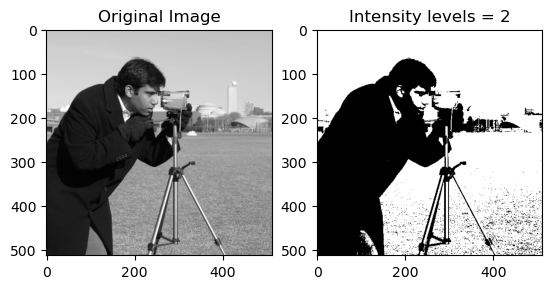

In [21]:
#get input level
levels = int(input("Enter intensity level:"))

#Convert intensity level
div = 255/(levels - 1)
image2 = np.round(image/div)*div

fig,arr= plt.subplots(1,2)
arr[0].imshow(image)
arr[0].set_title('Original Image')
arr[1].imshow(image2)
arr[1].set_title('Intensity levels = {}'.format(levels))


# Simple spatial averaging

Text(0.5, 1.0, '20x20 Kernel')

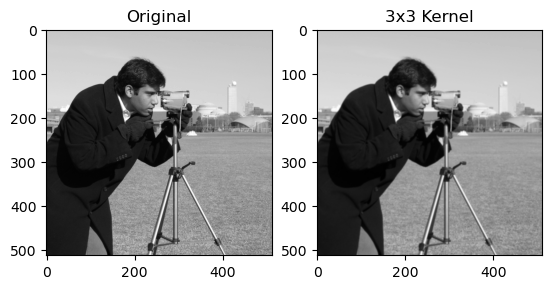

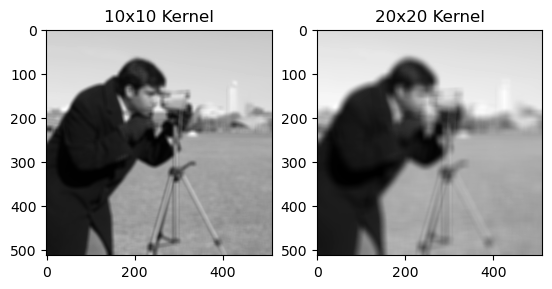

In [22]:
#3x3, 10x10, 20x20 spatial average images
image3k = cv.blur(image,(3,3)) 
image10k = cv.blur(image,(10,10)) 
image20k = cv.blur(image,(20,20))

fig,arr1= plt.subplots(1,2)
fig,arr2= plt.subplots(1,2)

arr1[0].imshow(image)
arr1[0].set_title('Original')

arr1[1].imshow(image3k)
arr1[1].set_title('3x3 Kernel')

arr2[0].imshow(image10k )
arr2[0].set_title('10x10 Kernel')

arr2[1].imshow(image20k )
arr2[1].set_title('20x20 Kernel')






# Image rotation

Text(0.5, 1.0, '90 degree rotated')

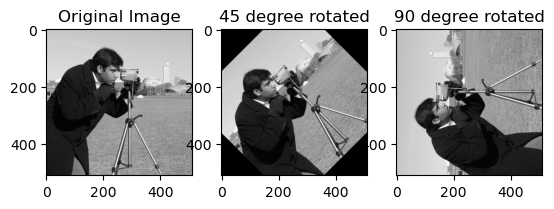

In [23]:
#Image rotation
(h, w) = image.shape[:2]
(cX, cY) = (w // 2, h // 2)

M = cv.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated45 = cv.warpAffine(image, M, (w, h))

M = cv.getRotationMatrix2D((cX, cY), 90, 1.0)
rotated90 = cv.warpAffine(image, M, (w, h))

fig,arr= plt.subplots(1,3)

arr[0].imshow(image)
arr[0].set_title('Original Image')

arr[1].imshow(rotated45)
arr[1].set_title('45 degree rotated')

arr[2].imshow(rotated90)
arr[2].set_title('90 degree rotated')

# Averaging for every 3×3,5x5,7x7 blocks

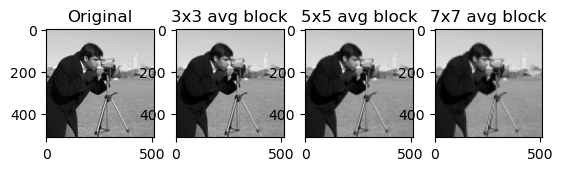

In [39]:
STRIDE = (3,5,7)
rows,cols = image.shape

fig,arr = plt.subplots(1, len(STRIDE)+1)
arr[0].imshow(image);
arr[0].set_title('Original')

for i,S in enumerate(STRIDE):
    image_mod = image.copy()
    for r in range(int(S/2),rows,S):
        for c in range(int(S/2),cols,S):
            image_mod[r-int(S/2):r+int(S/2)+1,c-int(S/2):c+int(S/2)+1] = np.average(image[r-int(S/2):r+int(S/2)+1,c-int(S/2):c+int(S/2)+1])
    arr[i+1].imshow(image_mod);
    arr[i+1].set_title('{}x{} avg block'.format(S,S))